In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [11]:
import numpy as np

# Step i: Generate 10-dimensional vector from standard normal distribution
def generate_training_set(m, d=10):
    w = np.random.randn(d)
    w /= np.linalg.norm(w)
    X = np.random.randn(m, d)
    logits = X @ w
    probs = 1 / (1 + np.exp(-logits))
    y = np.random.binomial(1, probs)
    return w, X, y



## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [12]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(X, y):
    model = LogisticRegression(max_iter=1000, fit_intercept=False)
    model.fit(X, y)
    return model.coef_.flatten()

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_square_loss(X, y, eta=0.01, max_iter=1000):
    m, d = X.shape
    w = np.zeros(d)
    for _ in range(max_iter):
        z = X @ w
        s = sigmoid(z)
        grad = (1/m) * ((s - y) * s * (1 - s)) @ X
        w -= eta * grad
    return w

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [14]:
def sgd_square_loss(X, y, eta=0.01, max_iter=1000):
    m, d = X.shape
    w = np.zeros(d)
    for _ in range(max_iter):
        i = np.random.randint(m)
        xi, yi = X[i], y[i]
        zi = np.dot(w, xi)
        si = sigmoid(zi)
        grad = (si - yi) * si * (1 - si) * xi
        w -= eta * grad
    return w

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w -
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

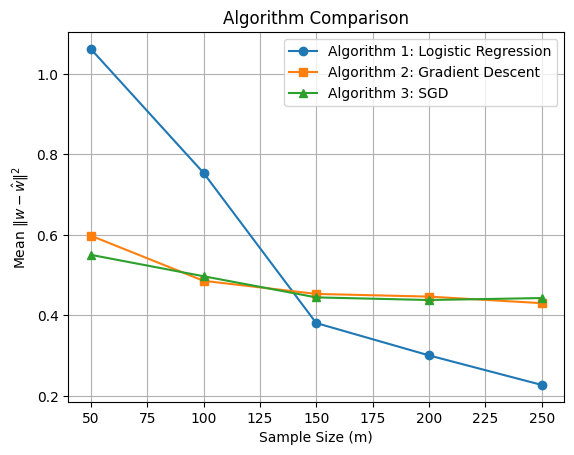

Time taken (seconds):
Algorithm 1 (Logistic Regression): 0.26s
Algorithm 2 (Gradient Descent): 1.85s
Algorithm 3 (SGD): 1.20s


In [15]:
import matplotlib.pyplot as plt
import time

sample_sizes = [50, 100, 150, 200, 250]
num_trials = 20
d = 10

errors_lr = []
errors_gd = []
errors_sgd = []

start_lr = time.time()
for m in sample_sizes:
    error = 0
    for _ in range(num_trials):
        true_w, X, y = generate_training_set(m, d)
        w_hat = logistic_regression(X, y)
        error += np.linalg.norm(true_w - w_hat) ** 2
    errors_lr.append(error / num_trials)
time_lr = time.time() - start_lr

start_gd = time.time()
for m in sample_sizes:
    error = 0
    for _ in range(num_trials):
        true_w, X, y = generate_training_set(m, d)
        w_hat = gradient_descent_square_loss(X, y)
        error += np.linalg.norm(true_w - w_hat) ** 2
    errors_gd.append(error / num_trials)
time_gd = time.time() - start_gd

start_sgd = time.time()
for m in sample_sizes:
    error = 0
    for _ in range(num_trials):
        true_w, X, y = generate_training_set(m, d)
        w_hat = sgd_square_loss(X, y)
        error += np.linalg.norm(true_w - w_hat) ** 2
    errors_sgd.append(error / num_trials)
time_sgd = time.time() - start_sgd

plt.plot(sample_sizes, errors_lr, 'o-', label='Algorithm 1: Logistic Regression')
plt.plot(sample_sizes, errors_gd, 's-', label='Algorithm 2: Gradient Descent')
plt.plot(sample_sizes, errors_sgd, '^-', label='Algorithm 3: SGD')
plt.xlabel('Sample Size (m)')
plt.ylabel(r'Mean $\|w - \hat{w}\|^2$')
plt.title('Algorithm Comparison')
plt.legend()
plt.grid(True)
plt.show()

print("Time taken (seconds):")
print(f"Algorithm 1 (Logistic Regression): {time_lr:.2f}s")
print(f"Algorithm 2 (Gradient Descent): {time_gd:.2f}s")
print(f"Algorithm 3 (SGD): {time_sgd:.2f}s")

# Problem 2

In [16]:
from sklearn import datasets


In [17]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

Depth: 1, Mean 10-fold Cross-Validation Accuracy: 0.9508
Depth: 2, Mean 10-fold Cross-Validation Accuracy: 0.9508
Depth: 3, Mean 10-fold Cross-Validation Accuracy: 0.9648
Depth: 4, Mean 10-fold Cross-Validation Accuracy: 0.9579
Depth: 5, Mean 10-fold Cross-Validation Accuracy: 0.9666


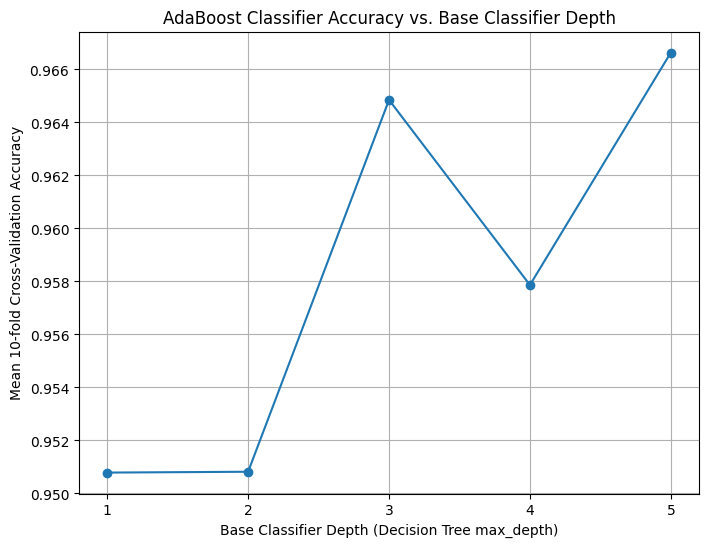

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

X, y = cancer.data, cancer.target

# Store accuracies for plotting
accuracies = []
depths = range(1, 6) # Depths from 1 to 5

# 2. Iterate through depths from 1 to 5
for depth in depths:
    # 3. Instantiate a Decision Tree Classifier as the base learner
    base_learner = DecisionTreeClassifier(max_depth=depth, random_state=101)

    # 4. Instantiate an AdaBoost Classifier
    adaboost_classifier = AdaBoostClassifier(
        base_learner,
        n_estimators=10,
        learning_rate=1,
        random_state=101
    )

    # 5. Perform 10-fold cross-validation and record the mean accuracy
    scores = cross_val_score(adaboost_classifier, X, y, cv=10, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    accuracies.append(mean_accuracy)
    print(f"Depth: {depth}, Mean 10-fold Cross-Validation Accuracy: {mean_accuracy:.4f}")

# 6. Plot the resulting curve of accuracy against base classifier depth
plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-')
plt.title('AdaBoost Classifier Accuracy vs. Base Classifier Depth')
plt.xlabel('Base Classifier Depth (Decision Tree max_depth)')
plt.ylabel('Mean 10-fold Cross-Validation Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()